In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



In [3]:
df=pd.read_csv("data.csv")

In [4]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [5]:
(df.isnull().mean() * 100).round(2)

LoanID            0.0
Age               0.0
Income            0.0
LoanAmount        0.0
CreditScore       0.0
MonthsEmployed    0.0
NumCreditLines    0.0
InterestRate      0.0
LoanTerm          0.0
DTIRatio          0.0
Education         0.0
EmploymentType    0.0
MaritalStatus     0.0
HasMortgage       0.0
HasDependents     0.0
LoanPurpose       0.0
HasCoSigner       0.0
Default           0.0
dtype: float64

No nan values

In [6]:
df["Default"].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

Uniquely distributed column

In [19]:
df.drop(columns=["LoanID"],inplace=True)

Encoding categorical columns

In [26]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)


Categorical columns: ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


In [27]:
df_encoded = df.copy()
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))

In [29]:
print("Variance of numeric columns:")
numeric_variance = df.select_dtypes(include=[np.number]).var().sort_values()
print(numeric_variance)
print("\n" + "="*50 + "\n")

Variance of numeric columns:
DTIRatio          5.332248e-02
Default           1.026429e-01
NumCreditLines    1.247728e+00
InterestRate      4.404238e+01
Age               2.247078e+02
LoanTerm          2.879582e+02
MonthsEmployed    1.200163e+03
CreditScore       2.525044e+04
Income            1.518116e+09
LoanAmount        5.018406e+09
dtype: float64




In [30]:
cov_matrix = df_encoded.cov()
cov_matrix

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
Age,224.707847,-7.266333e+02,-2.349755e+03,-1.305749,-0.177287,-0.014899,-0.112154,0.066988,-0.016232,-0.014786,0.013183,-0.026754,0.000261,0.005324,0.047948,-0.021869,-0.805790
Income,-726.633252,1.518116e+09,-2.388444e+06,-8856.434459,3610.576524,-87.758937,-595.610079,-659.983685,1.848896,-42.051104,-224.040790,20.259880,-18.402591,-30.578798,-115.147733,-68.643971,-1237.302790
LoanAmount,-2349.755323,-2.388444e+06,5.018406e+09,14197.937653,6912.970233,62.861514,-1077.124510,3050.937995,18.360894,202.159575,242.201291,-44.546192,-28.367983,4.929730,5.669849,-65.455812,1966.807516
CreditScore,-1.305749,-8.856434e+03,1.419794e+04,25250.438819,3.373593,0.002847,0.459933,3.048022,-0.038134,0.038107,0.622025,-0.417243,0.137324,-0.239781,0.133792,-0.218884,-1.739399
MonthsEmployed,-0.177287,3.610577e+03,6.912970e+03,3.373593,1200.163476,0.049034,0.021973,-0.685499,0.014117,-0.050531,0.021836,-0.002697,0.003639,0.025111,-0.126242,0.018105,-1.080754
NumCreditLines,-0.014899,-8.775894e+01,6.286151e+01,0.002847,0.049034,1.247728,-0.002199,-0.004280,-0.000151,0.003363,0.000273,-0.000605,-0.000974,-0.001059,0.000536,0.001176,0.010138
InterestRate,-0.112154,-5.956101e+02,-1.077125e+03,0.459933,0.021973,-0.002199,44.042377,0.100454,0.000882,0.021379,0.003891,-0.027509,-0.001408,-0.000807,0.013800,-0.013242,0.279110
LoanTerm,0.066988,-6.599837e+02,3.050938e+03,3.048022,-0.685499,-0.004280,0.100454,287.958162,0.008907,-0.056931,0.014777,-0.014425,0.015062,0.020506,0.068459,-0.009895,0.002961
DTIRatio,-0.016232,1.848896e+00,1.836089e+01,-0.038134,0.014117,-0.000151,0.000882,0.008907,0.053322,0.000462,-0.000149,0.000847,0.000027,0.000172,-0.001246,0.000043,0.001423
Education,-0.014786,-4.205110e+01,2.021596e+02,0.038107,-0.050531,0.003363,0.021379,-0.056931,0.000462,1.251771,0.000295,-0.004306,0.000653,0.000586,-0.005171,0.000955,-0.008185


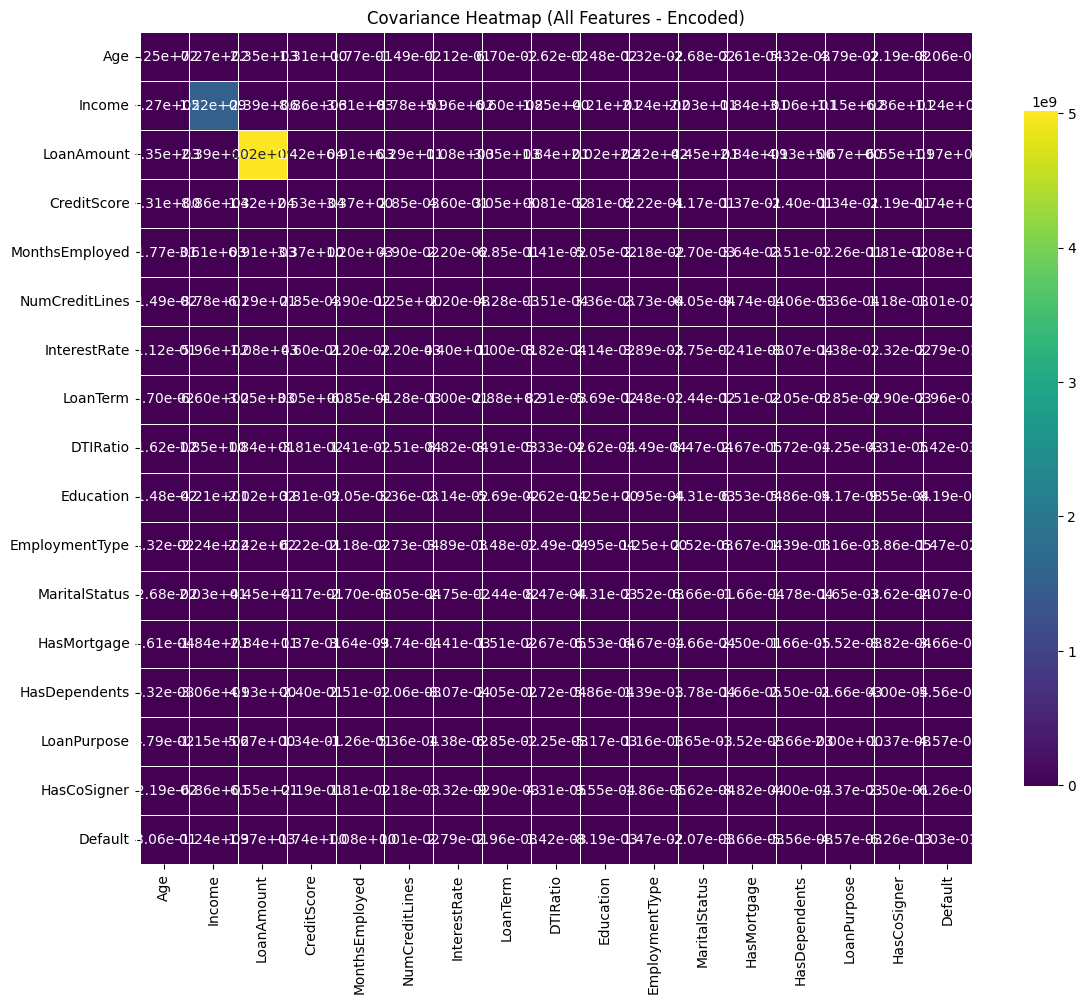

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, fmt='.2e', cmap='viridis', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Covariance Heatmap')
plt.tight_layout()
plt.show()

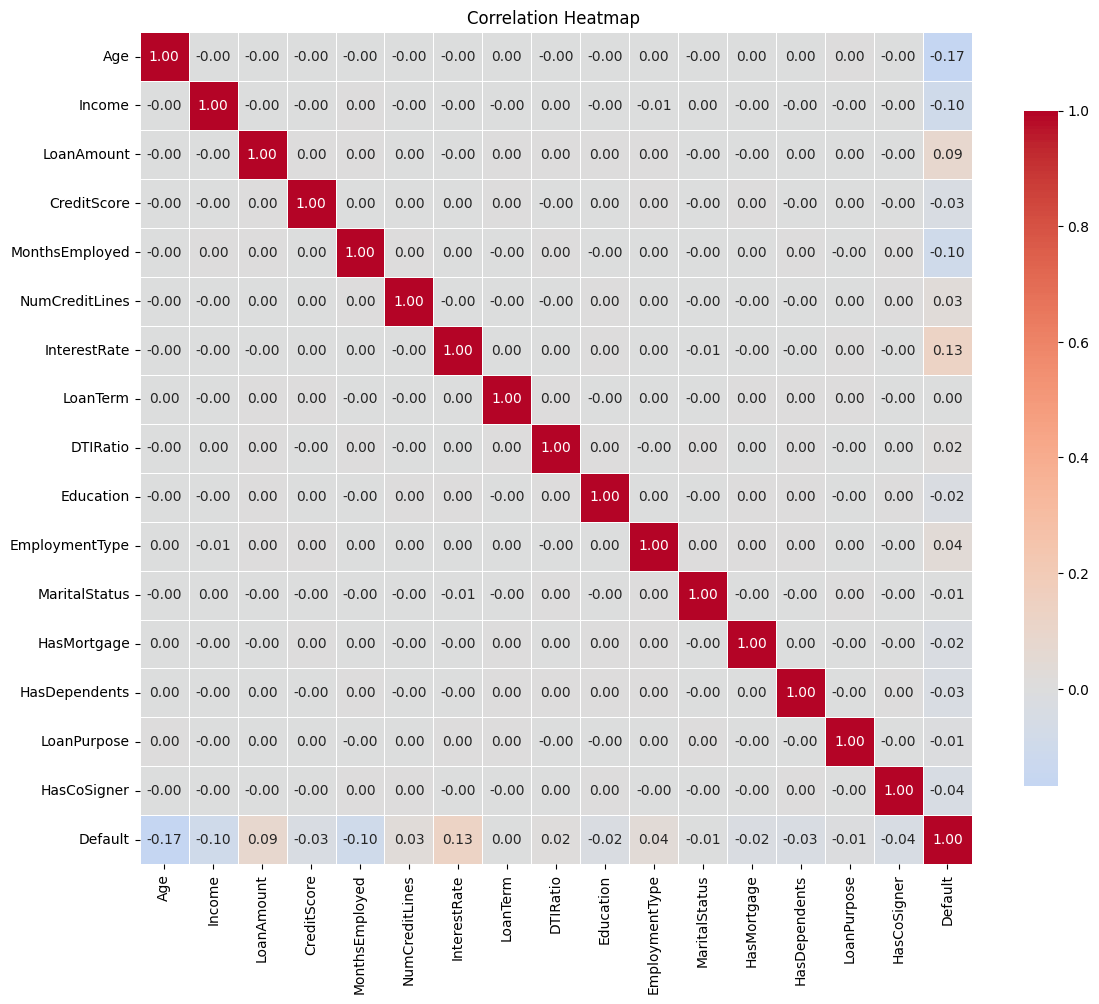

In [32]:
plt.figure(figsize=(12, 10))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap ')
plt.tight_layout()
plt.show()

We select the top corelated columns with our target ====> ['Age','Income','LoanAmount','MonthsEmployed','IntrestRate']

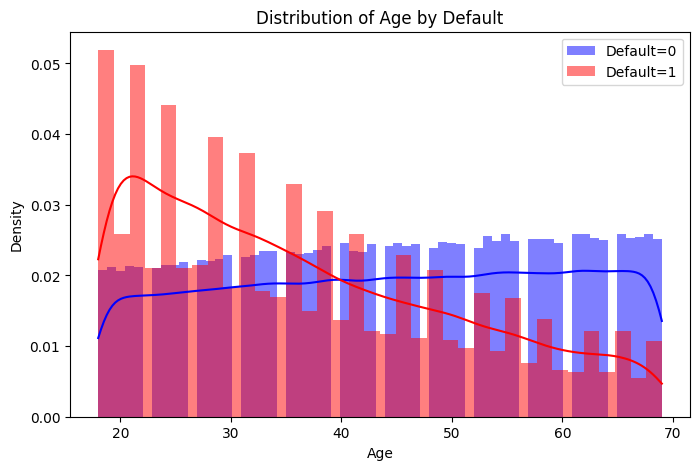

In [9]:
col="Age"
plt.figure(figsize=(8,5))
sns.histplot(df[df['Default'] == 0][col].dropna(), color='blue', label='Default=0',
                 stat='density', kde=True, alpha=0.5, edgecolor=None)
sns.histplot(df[df['Default'] == 1][col].dropna(), color='red', label='Default=1',
                 stat='density', kde=True, alpha=0.5, edgecolor=None)
plt.legend()
plt.title(f'Distribution of {col} by Default')
plt.xlabel(col)
plt.ylabel('Density')
plt.show()

In [10]:
data0 = df[df['Default'] == 0][col].dropna()
data1 = df[df['Default'] == 1][col].dropna()

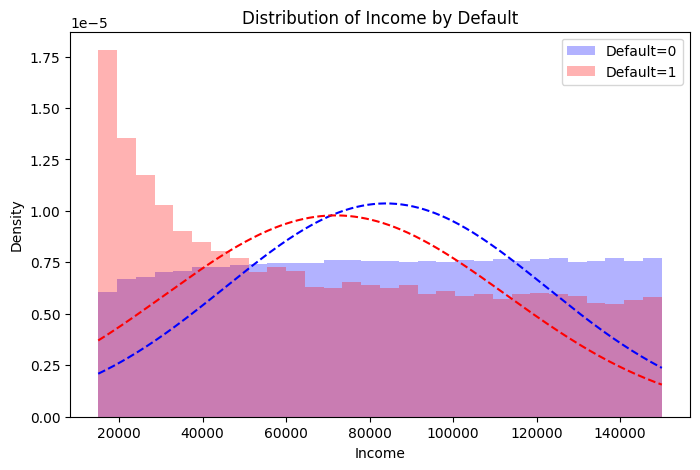

In [16]:
col = 'Income'  # replace with your numeric column

data0 = df[df['Default'] == 0][col].dropna()
data1 = df[df['Default'] == 1][col].dropna()

plt.figure(figsize=(8,5))
# density histograms
plt.hist(data0, bins=30, density=True, color='blue', alpha=0.3, label='Default=0')
plt.hist(data1, bins=30, density=True, color='red',  alpha=0.3, label='Default=1')

# normal fit lines
x = np.linspace(min(data0.min(), data1.min()), max(data0.max(), data1.max()), 300)
mu0, sd0 = data0.mean(), data0.std()
mu1, sd1 = data1.mean(), data1.std()
plt.plot(x, stats.norm.pdf(x, mu0, sd0), color='blue', linestyle='--')
plt.plot(x, stats.norm.pdf(x, mu1, sd1), color='red',  linestyle='--')

plt.title(f'Distribution of {col} by Default')
plt.xlabel(col)
plt.ylabel('Density')
plt.legend()
plt.show()

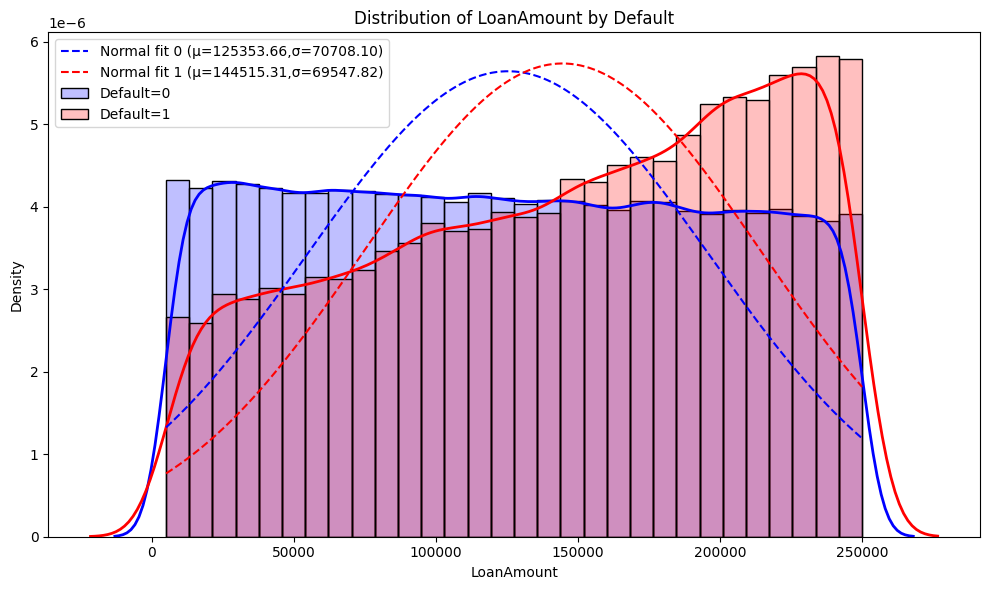

In [17]:
col = 'LoanAmount'
data0 = df[df['Default'] == 0][col].dropna()
data1 = df[df['Default'] == 1][col].dropna()
plt.figure(figsize=(10,6))

# density histograms (transparent) so KDE and normal fits are visible
sns.histplot(data0, stat='density', bins=30, color='blue', alpha=0.25, label='Default=0')
sns.histplot(data1, stat='density', bins=30, color='red', alpha=0.25, label='Default=1')

# non-parametric KDEs
sns.kdeplot(data0, color='blue', lw=2)
sns.kdeplot(data1, color='red', lw=2)

# parametric normal fits
xmin = min(data0.min(), data1.min())
xmax = max(data0.max(), data1.max())
x = np.linspace(xmin, xmax, 300)

mu0, sd0 = data0.mean(), data0.std()
mu1, sd1 = data1.mean(), data1.std()
pdf0 = stats.norm.pdf(x, mu0, sd0)
pdf1 = stats.norm.pdf(x, mu1, sd1)

plt.plot(x, pdf0, color='blue', linestyle='--', label=f'Normal fit 0 (μ={mu0:.2f},σ={sd0:.2f})')
plt.plot(x, pdf1, color='red', linestyle='--', label=f'Normal fit 1 (μ={mu1:.2f},σ={sd1:.2f})')

plt.title(f'Distribution of {col} by Default')
plt.xlabel(col)
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

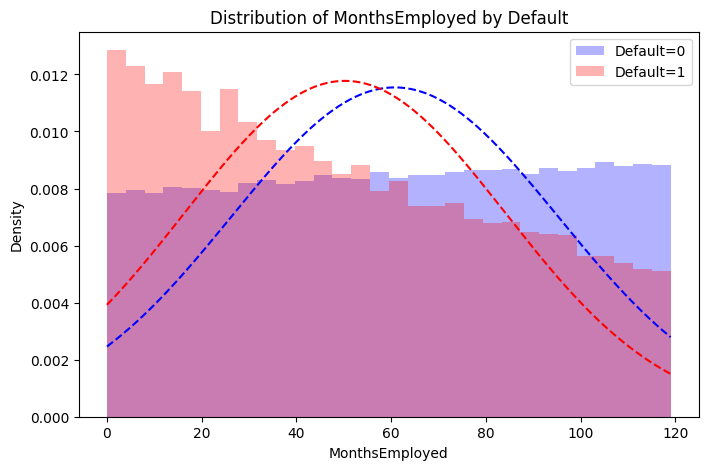

In [33]:
col = 'MonthsEmployed'  

data0 = df[df['Default'] == 0][col].dropna()
data1 = df[df['Default'] == 1][col].dropna()

plt.figure(figsize=(8,5))
# density histograms
plt.hist(data0, bins=30, density=True, color='blue', alpha=0.3, label='Default=0')
plt.hist(data1, bins=30, density=True, color='red',  alpha=0.3, label='Default=1')

# normal fit lines
x = np.linspace(min(data0.min(), data1.min()), max(data0.max(), data1.max()), 300)
mu0, sd0 = data0.mean(), data0.std()
mu1, sd1 = data1.mean(), data1.std()
plt.plot(x, stats.norm.pdf(x, mu0, sd0), color='blue', linestyle='--')
plt.plot(x, stats.norm.pdf(x, mu1, sd1), color='red',  linestyle='--')

plt.title(f'Distribution of {col} by Default')
plt.xlabel(col)
plt.ylabel('Density')
plt.legend()
plt.show()

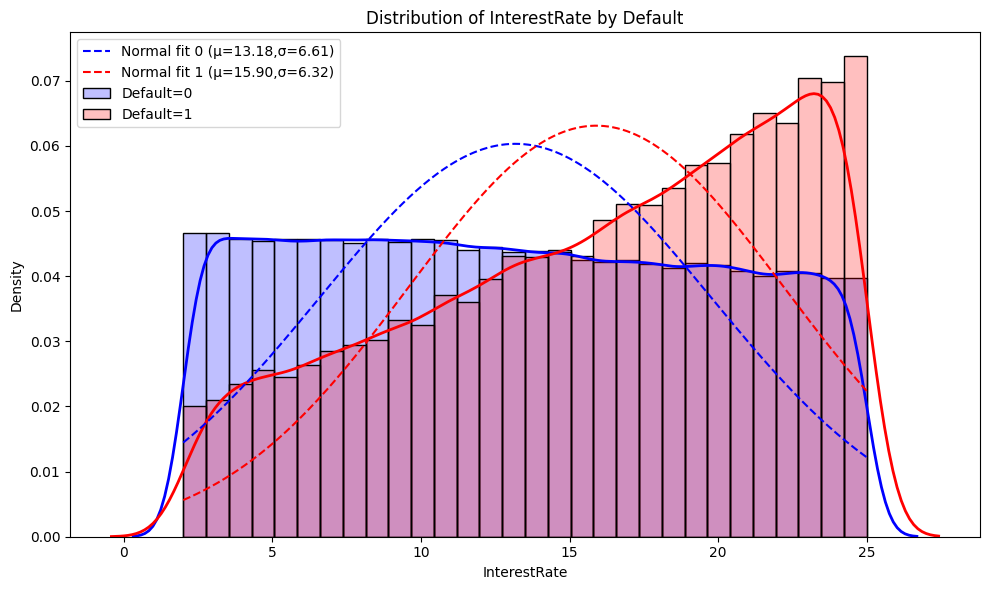

In [34]:
col = 'InterestRate'
data0 = df[df['Default'] == 0][col].dropna()
data1 = df[df['Default'] == 1][col].dropna()
plt.figure(figsize=(10,6))

# density histograms (transparent) so KDE and normal fits are visible
sns.histplot(data0, stat='density', bins=30, color='blue', alpha=0.25, label='Default=0')
sns.histplot(data1, stat='density', bins=30, color='red', alpha=0.25, label='Default=1')

# non-parametric KDEs
sns.kdeplot(data0, color='blue', lw=2)
sns.kdeplot(data1, color='red', lw=2)

# parametric normal fits
xmin = min(data0.min(), data1.min())
xmax = max(data0.max(), data1.max())
x = np.linspace(xmin, xmax, 300)

mu0, sd0 = data0.mean(), data0.std()
mu1, sd1 = data1.mean(), data1.std()
pdf0 = stats.norm.pdf(x, mu0, sd0)
pdf1 = stats.norm.pdf(x, mu1, sd1)

plt.plot(x, pdf0, color='blue', linestyle='--', label=f'Normal fit 0 (μ={mu0:.2f},σ={sd0:.2f})')
plt.plot(x, pdf1, color='red', linestyle='--', label=f'Normal fit 1 (μ={mu1:.2f},σ={sd1:.2f})')

plt.title(f'Distribution of {col} by Default')
plt.xlabel(col)
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
df=df_encoded[["Age","Income","LoanAmount","MonthsEmployed","InterestRate","Default"]]

In [39]:
df

,Age,Income,LoanAmount,MonthsEmployed,InterestRate,Default
0,56,85994,50587,80,15.23,0
1,69,50432,124440,15,4.81,0
2,46,84208,129188,26,21.17,1
3,32,31713,44799,0,7.07,0
4,60,20437,9139,8,6.51,0
...,...,...,...,...,...,...
255342,19,37979,210682,109,14.11,0
255343,32,51953,189899,14,11.55,1
255344,56,84820,208294,70,5.29,0
255345,42,85109,60575,40,20.90,0


In [41]:
X = df.drop(columns=['Default'])
y = df['Default']

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [44]:
df_standardized = pd.concat([X_scaled_df, y], axis=1)

In [45]:
df_standardized

,Age,Income,LoanAmount,MonthsEmployed,InterestRate,Default
0,0.833990,0.089693,-1.086833,0.590533,0.261771,0
1,1.701221,-0.823021,-0.044309,-1.285731,-1.308350,0
2,0.166888,0.043854,0.022715,-0.968209,1.156831,1
3,-0.767053,-1.303452,-1.168538,-1.718715,-0.967805,0
4,1.100830,-1.592855,-1.671921,-1.487790,-1.052188,0
...,...,...,...,...,...,...
255342,-1.634285,-1.142632,1.173101,1.427636,0.093006,0
255343,-0.767053,-0.783984,0.879724,-1.314597,-0.292744,1
255344,0.833990,0.059562,1.139391,0.301877,-1.236022,0
255345,-0.099952,0.066979,-0.945840,-0.564091,1.116146,0


In [47]:
df_standardized.to_csv("data_standardized.csv")